________________________________________________________________________________________________________________________


* Yuvraj Sutar 
* yuvrajsutar009@gmail.com
_ _________________________________________________________________________________________________________________________
_  _________________________________________________________________________________________________________________________

# Decision Tree Classifier

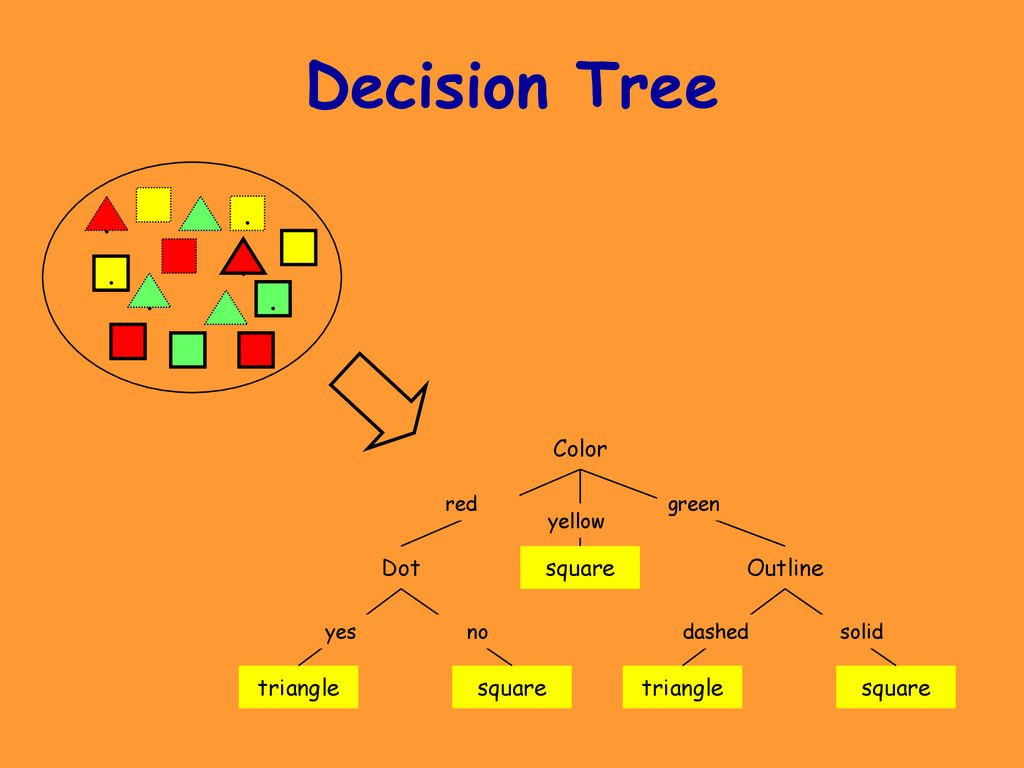

### A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.

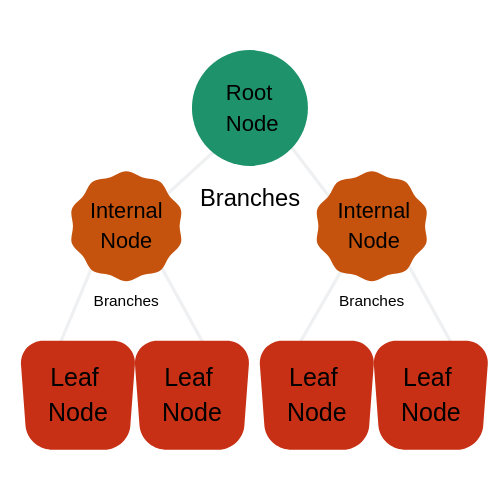

### 1) Root Node: The root node is the starting point of a tree. At this point, the first split is performed.
### 2) Internal Nodes: Each internal node represents a decision point (predictor variable) that eventually leads to the prediction of the outcome.
### 3) Leaf/ Terminal Nodes: Leaf nodes represent the final class of the outcome and therefore they’re also called terminating nodes.
### 4) Branches: Branches are connections between nodes, they’re represented as arrows. Each branch represents a response such as yes or no.



# Parameters :-
## • Criterion :-
#### criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.


## • Splitter :-
#### splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

## • Max_depth :-
#### max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).


## • Max_leaf_nodes :-
### max_leaf_nodesint, default=None
#### Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.


## • Max_features :-
### max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None
#### The number of features to consider when looking for the best split:
#### If int, then consider max_features features at each split.

#### If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.

#### If “auto”, then max_features=sqrt(n_features).

#### If “sqrt”, then max_features=sqrt(n_features).

#### If “log2”, then max_features=log2(n_features).

#### If None, then max_features=n_features.

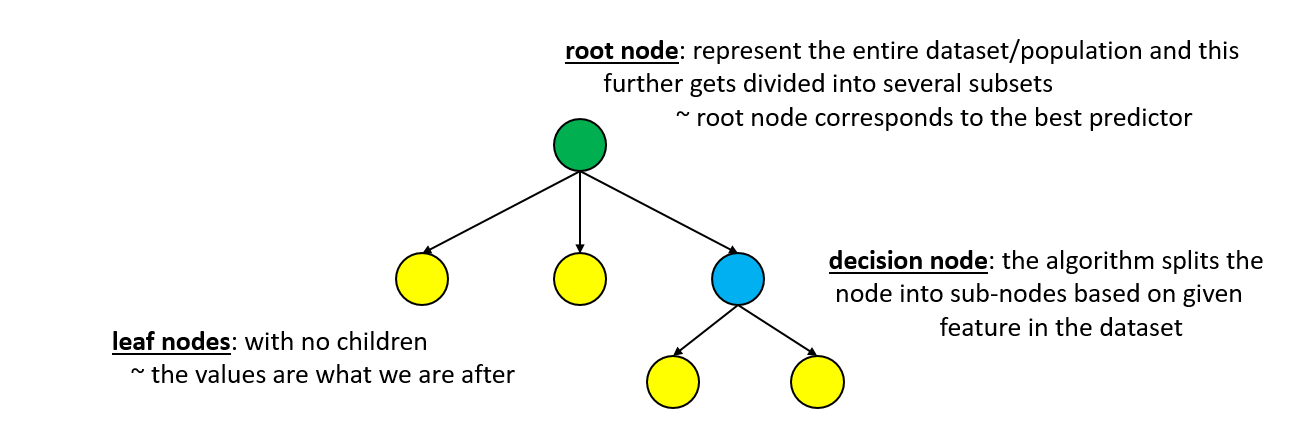

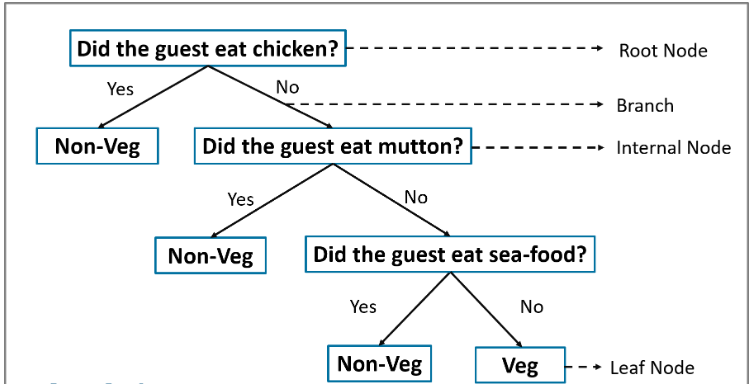

## Example:-

### Below diagram illustrate the basic flow of decision tree for decision making with labels (Rain(Yes), No Rain(No)).


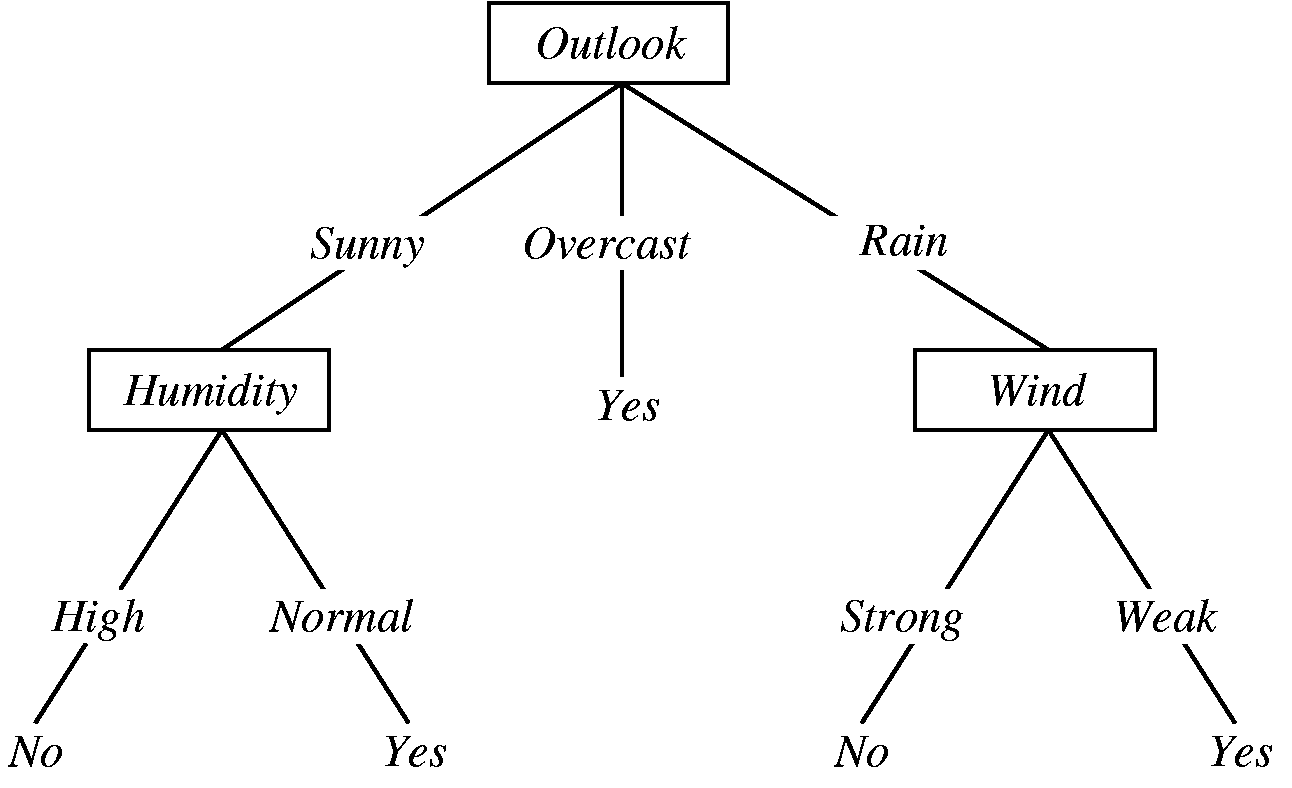

# Entropy
### Definition: Entropy is the measures of impurity, disorder or uncertainty in a bunch of examples.

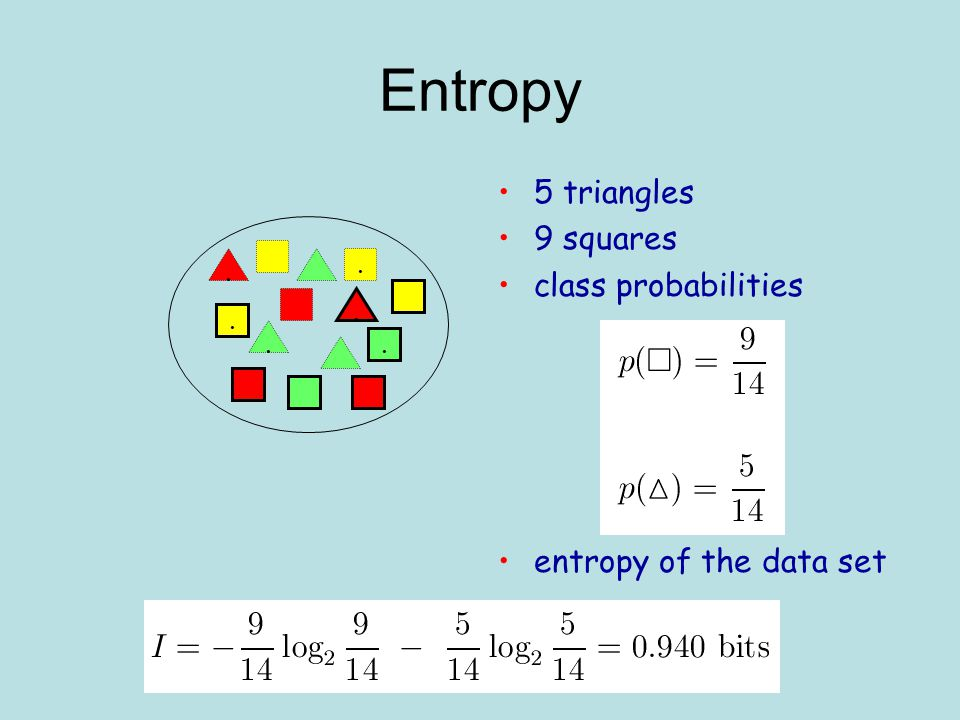

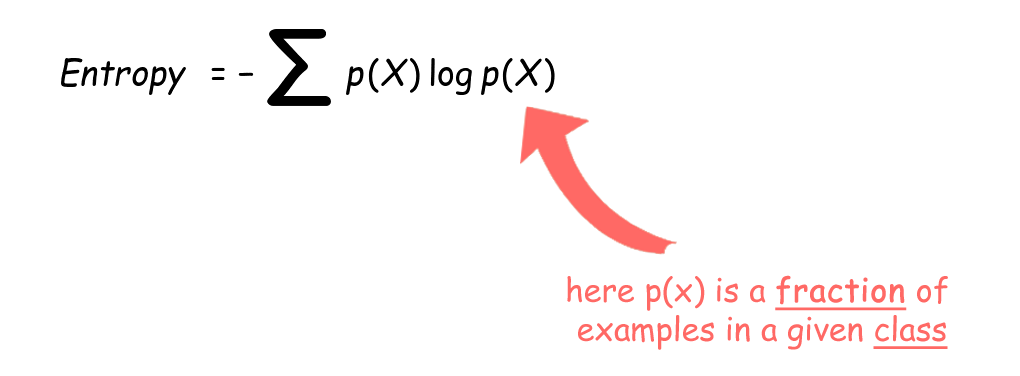

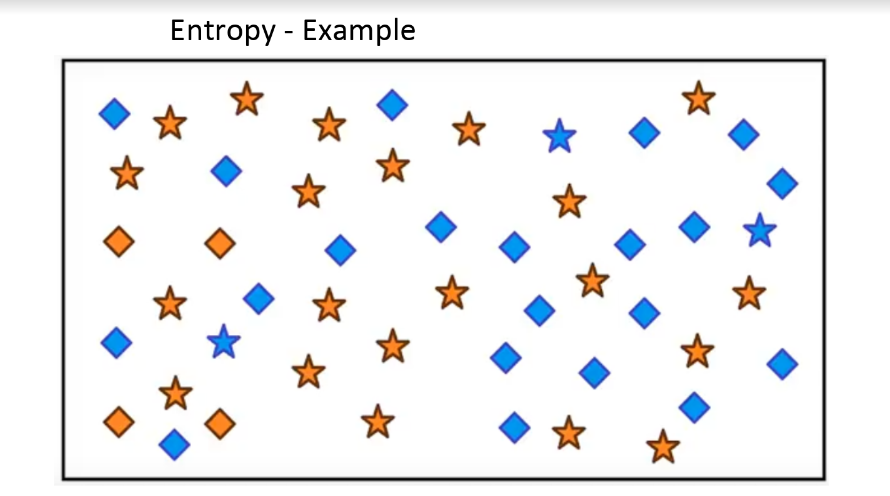

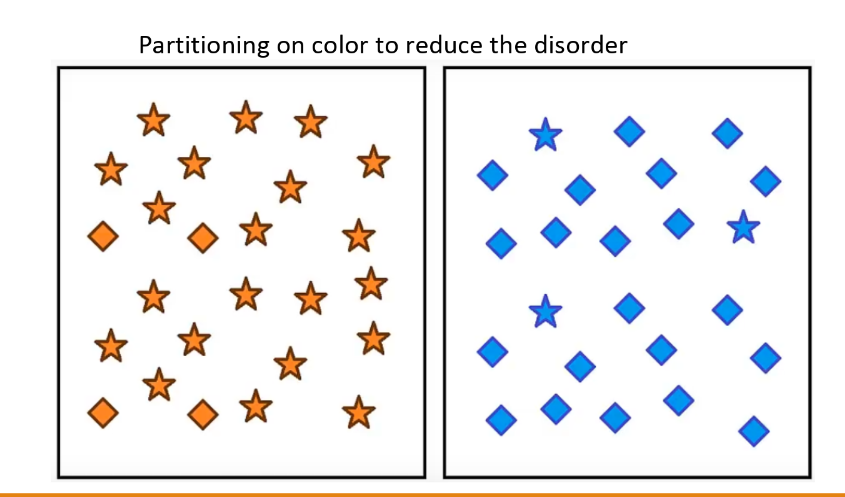

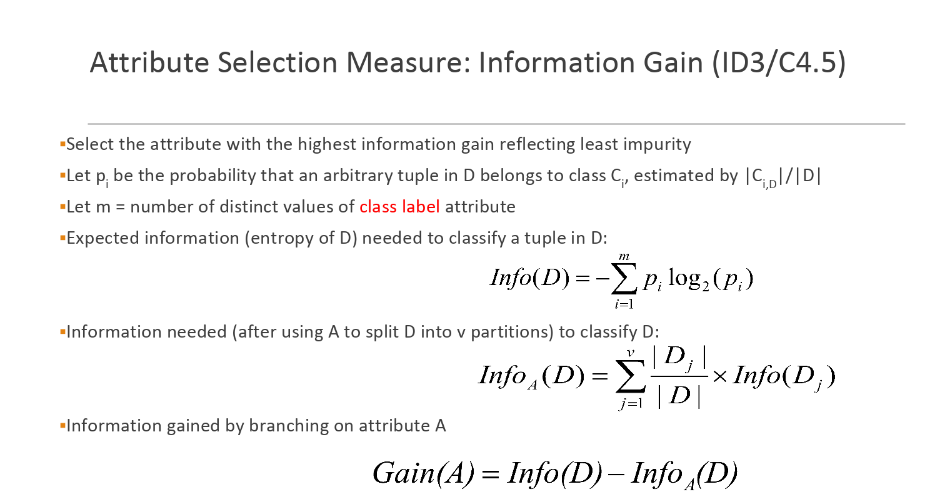

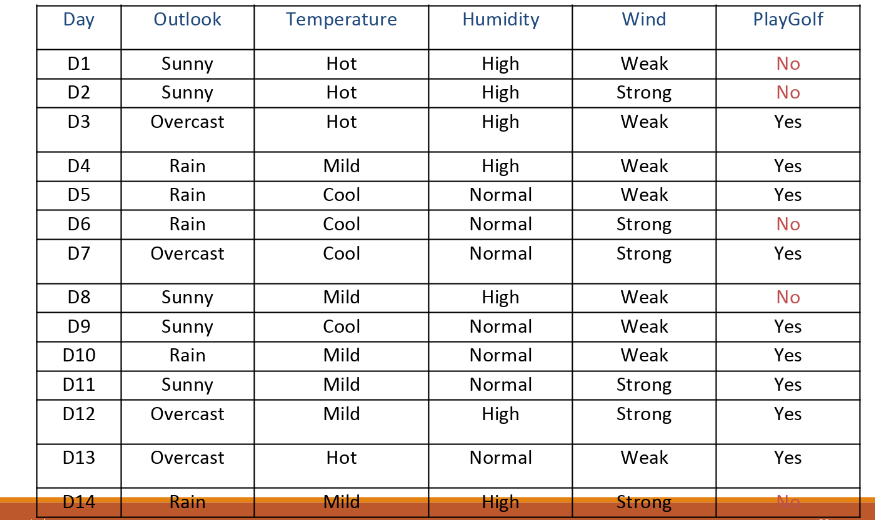

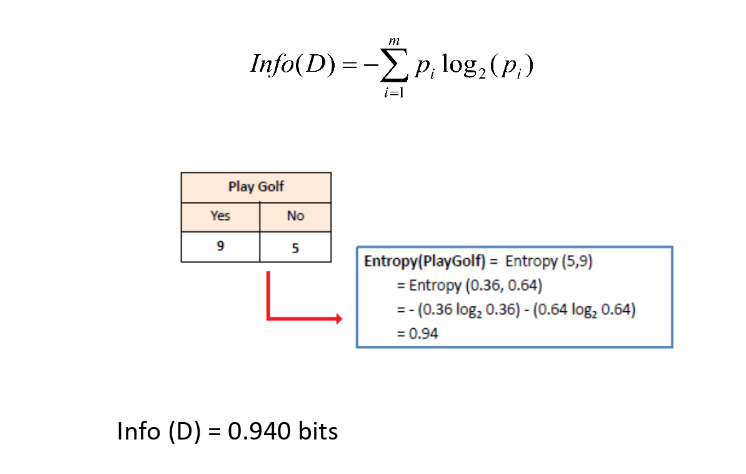

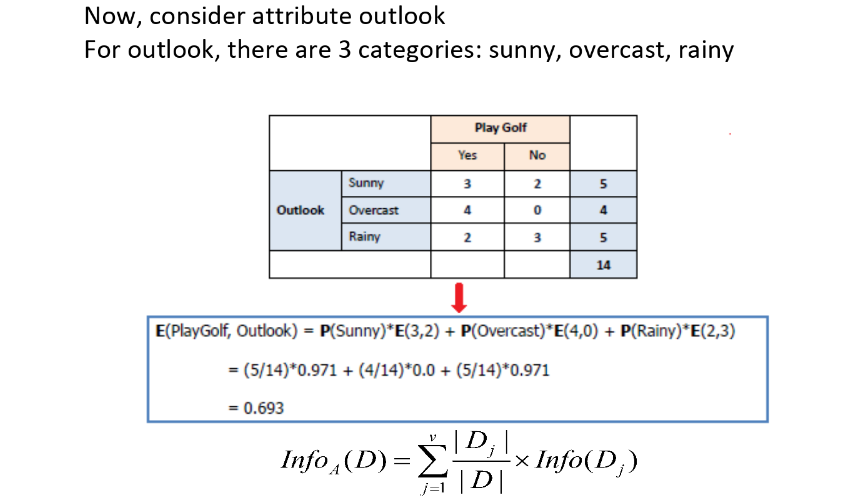

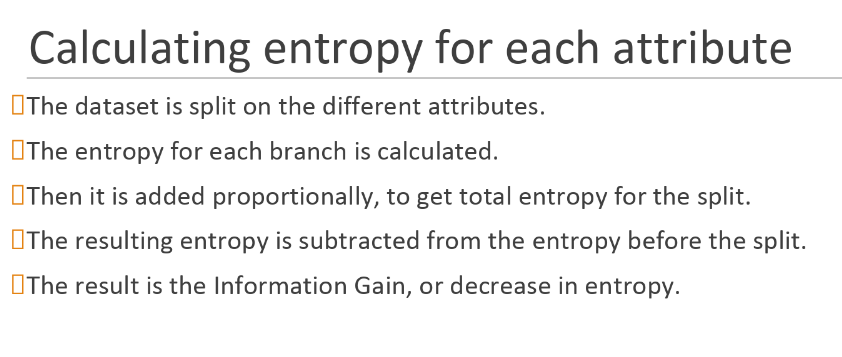

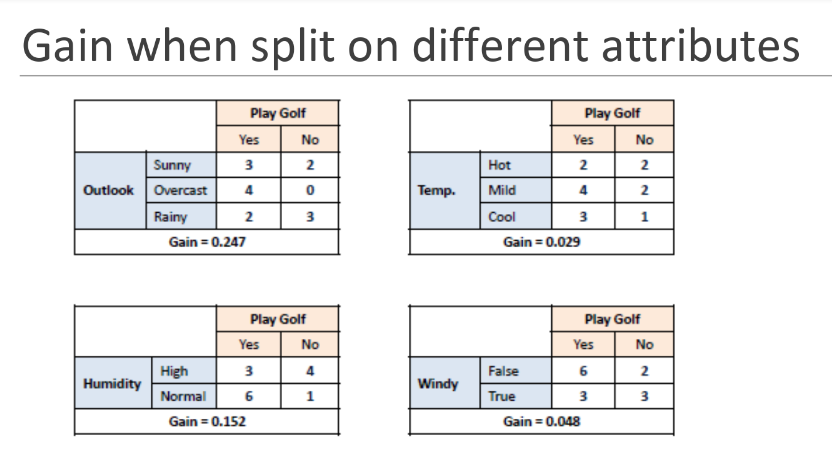

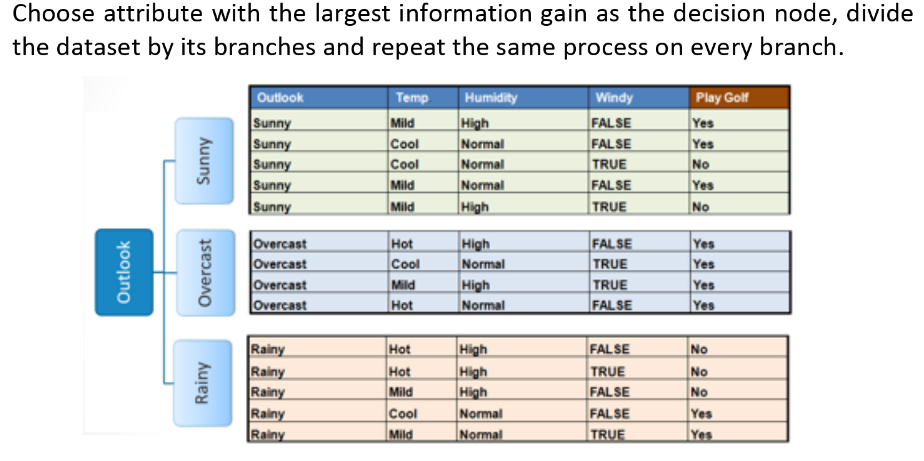

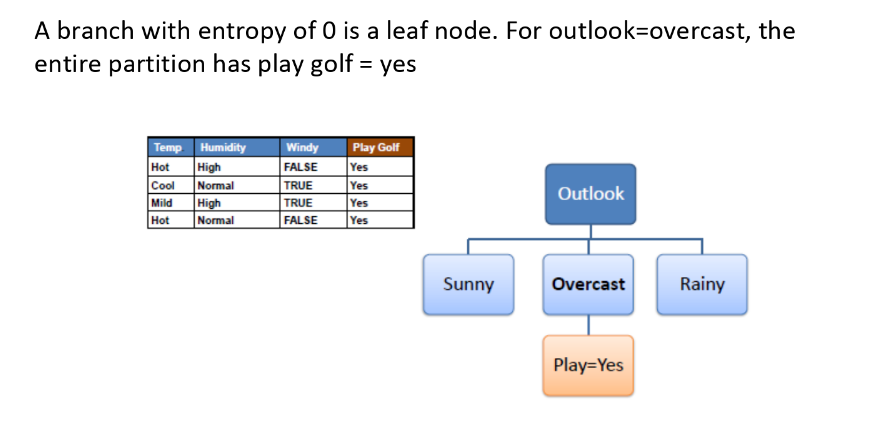

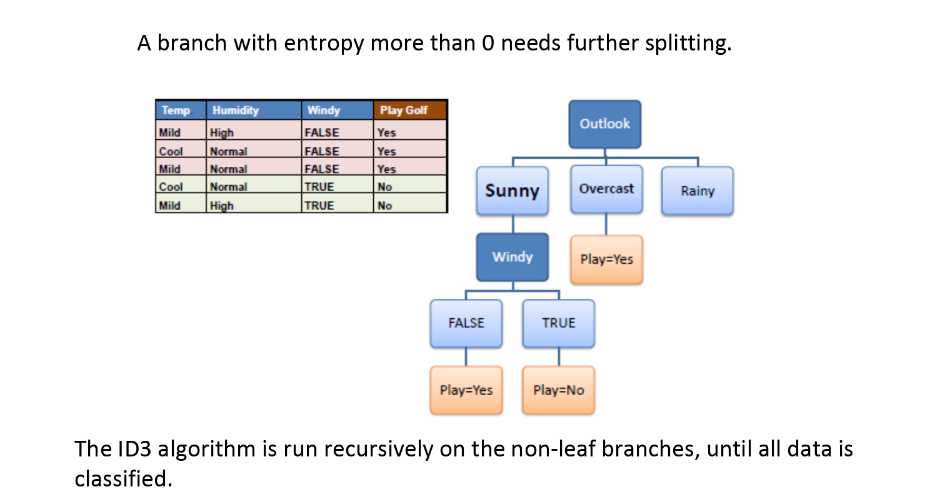

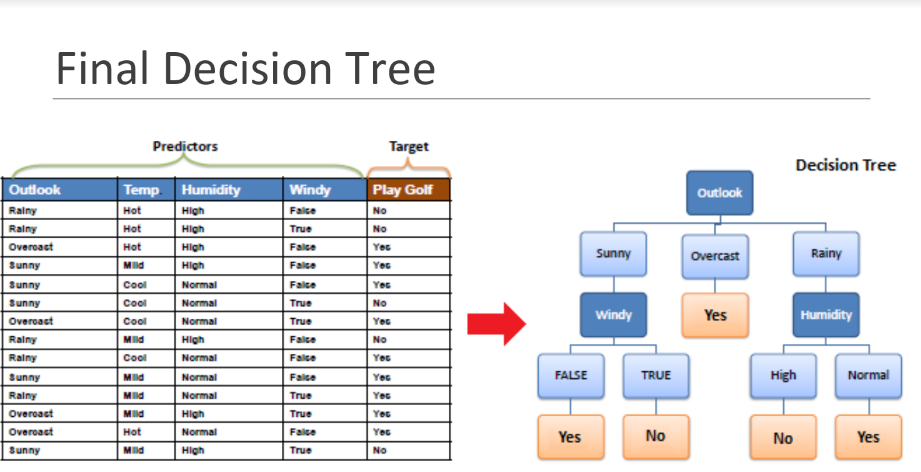

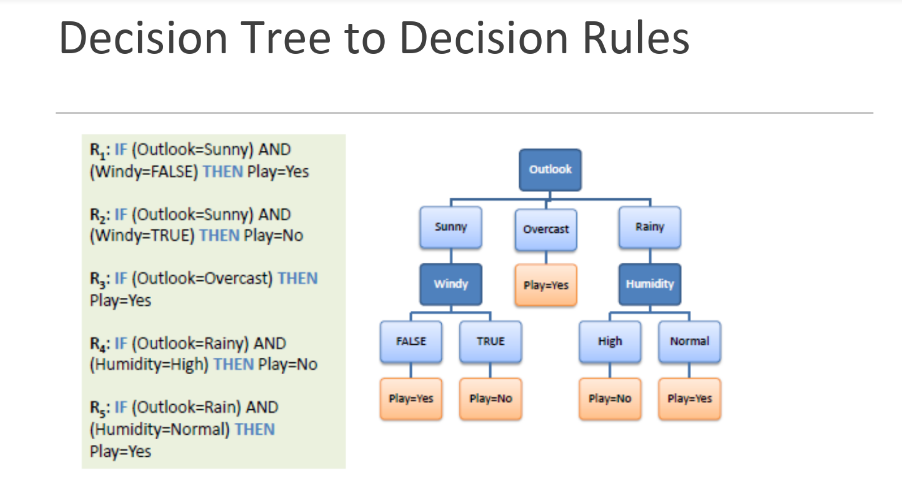

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier #regresor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
import seaborn as sns
#data=read_csv("location//USA_Housing.csv")
data=sns.load_dataset("iris")

#missing value
# print(data.isnull().sum())
# data.drop("deck",axis=1,inplace=True)
# data["age"]=data["age"].fillna(np.mean(data["age"]))
# data.dropna(axis=0,inplace=True)

data.head()
#Import
#X,Y seperate
#Train test split   (200,0.3)
#Model fit
#Predict
#RMSE
#sns.get_dataset_names() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
l=['sex',"embarked","class","who","adult_male","embark_town","alone"]

for i in l:
    le =LabelEncoder()
    le.fit(data[i])
    data[i]=le.transform(data[i])
data.head()
    

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,no,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,yes,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,yes,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,yes,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,no,1


In [10]:
#split dataset in features and target variable
#data Separation
X = data.drop(["fare","adult_male","alive","alone","survived"],axis=1)   #Independant
y = data.iloc[:,12]    #dependant


In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200) # 70% training and 30% test
X_train

,pclass,sex,age,sibsp,parch,embarked,class,who,embark_town
246,3,0,25.000000,0,0,2,2,2,2
87,3,1,29.699118,0,0,2,2,1,2
177,1,0,50.000000,0,0,0,0,2,0
184,3,0,4.000000,0,2,2,2,0,2
401,3,1,26.000000,0,0,2,2,1,2
...,...,...,...,...,...,...,...,...,...
811,3,1,39.000000,0,0,2,2,1,2
838,3,1,32.000000,0,0,2,2,1,2
785,3,1,25.000000,0,0,2,2,1,2
618,2,0,4.000000,2,1,2,1,0,2


In [13]:
# Create Decision Tree classifer object
DT=DecisionTreeClassifier(criterion="entropy",)

# Train Decision Tree Classifer
DT.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = DT.predict(X_test)
y_pred

array(['no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no',
       'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no'

In [68]:
DT.get_depth()

21

In [1]:
# from sklearn import tree
# tree.plot_tree(DT)

In [74]:
c=X.columns
c

Index(['sex', 'age', 'sibsp', 'parch', 'embarked', 'class', 'who',
       'embark_town'],
      dtype='object')

In [75]:
pd.DataFrame(DT.feature_importances_,index=c)


,0
sex,0.250494
age,0.392031
sibsp,0.100793
parch,0.061166
embarked,0.031497
class,0.138649
who,0.008533
embark_town,0.016836


In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)) #78,

0.8164794007490637


In [77]:
accuracy_score(y_train,DT.predict(X_train)) #82.

0.9437299035369775

In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[145  16]
 [ 33  73]]


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.82      0.89      0.86       161
         yes       0.82      0.71      0.76       106

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267



________________________________________________________________________________________________________________________


* Yuvraj Sutar 
* yuvrajsutar009@gmail.com
_ _________________________________________________________________________________________________________________________
_  _________________________________________________________________________________________________________________________